# Trading Strategies (a)

## Simple Moving Averages

### Data Import

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [7]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)

In [19]:
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


In [21]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [22]:
symbol = 'AAPL.O'

In [23]:
data = (
    pd.DataFrame(raw[symbol])
    .dropna()
)

In [24]:
data.head()

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


### Trading Strategy

In [27]:
SMA1 = 42  
SMA2 = 252  

In [28]:
data['SMA1'] = data[symbol].rolling(SMA1).mean()  
data['SMA2'] = data[symbol].rolling(SMA2).mean()  

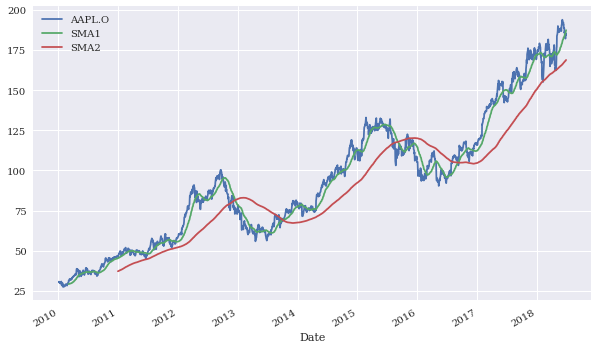

In [29]:
data.plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_plot_01.png')

In [33]:
data.dropna(inplace=True)

In [34]:
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  

In [35]:
data.tail()

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2018-06-25,182.17,185.606190,168.265556,1
2018-06-26,184.43,186.087381,168.418770,1
2018-06-27,184.16,186.607381,168.579206,1
2018-06-28,185.50,187.089286,168.736627,1
2018-06-29,185.11,187.470476,168.901032,1


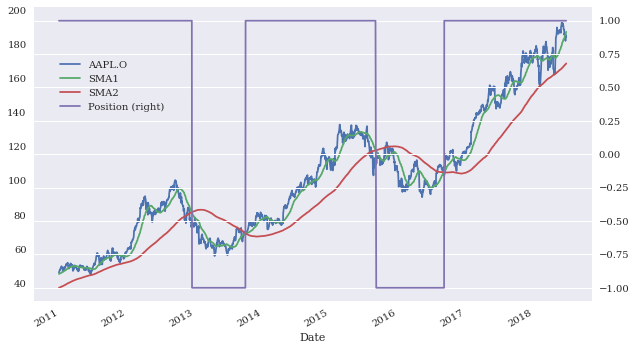

In [36]:
ax = data.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_02.png')

### Vectorized Backtesting

In [37]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))  

In [38]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']  

In [39]:
data.round(4).head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2010-12-31,46.0800,45.2810,37.1207,1,NaN,NaN
2011-01-03,47.0814,45.3497,37.1862,1,0.0215,0.0215
2011-01-04,47.3271,45.4126,37.2525,1,0.0052,0.0052
2011-01-05,47.7142,45.4661,37.3223,1,0.0081,0.0081
2011-01-06,47.6757,45.5226,37.3921,1,-0.0008,-0.0008


In [40]:
data.dropna(inplace=True)

In [41]:
np.exp(data[['Returns', 'Strategy']].sum())  

Returns     4.017148
Strategy    5.811299
dtype: float64

In [42]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5  

Returns     0.250571
Strategy    0.250407
dtype: float64

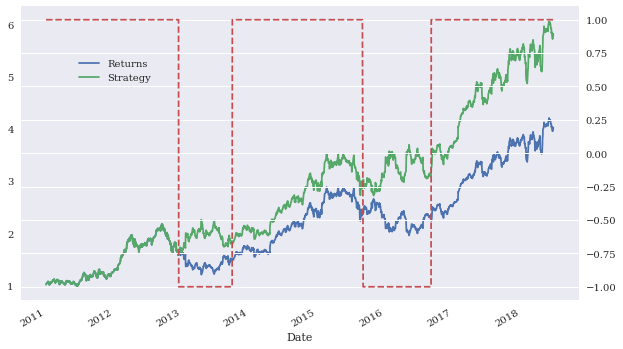

In [43]:
ax = data[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');

### Optimization

In [63]:
from itertools import product

In [64]:
sma1 = range(20, 61, 4)  
sma2 = range(180, 281, 10)  

In [77]:
for SMA1, SMA2 in product(sma1, sma2):
    print (SMA1,SMA2)

20 180
20 190
20 200
20 210
20 220
20 230
20 240
20 250
20 260
20 270
20 280
24 180
24 190
24 200
24 210
24 220
24 230
24 240
24 250
24 260
24 270
24 280
28 180
28 190
28 200
28 210
28 220
28 230
28 240
28 250
28 260
28 270
28 280
32 180
32 190
32 200
32 210
32 220
32 230
32 240
32 250
32 260
32 270
32 280
36 180
36 190
36 200
36 210
36 220
36 230
36 240
36 250
36 260
36 270
36 280
40 180
40 190
40 200
40 210
40 220
40 230
40 240
40 250
40 260
40 270
40 280
44 180
44 190
44 200
44 210
44 220
44 230
44 240
44 250
44 260
44 270
44 280
48 180
48 190
48 200
48 210
48 220
48 230
48 240
48 250
48 260
48 270
48 280
52 180
52 190
52 200
52 210
52 220
52 230
52 240
52 250
52 260
52 270
52 280
56 180
56 190
56 200
56 210
56 220
56 230
56 240
56 250
56 260
56 270
56 280
60 180
60 190
60 200
60 210
60 220
60 230
60 240
60 250
60 260
60 270
60 280


In [80]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):  
    data = pd.DataFrame(raw[symbol])
    data.dropna(inplace=True)
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = pd.concat([results,pd.DataFrame(
                {'SMA1': SMA1, 'SMA2': SMA2,
                 'MARKET': perf['Returns'],
                 'STRATEGY': perf['Strategy'],
                 'OUT': perf['Strategy'] - perf['Returns']},
                 index=[0])], ignore_index=True)  

In [81]:
results

,SMA1,SMA2,MARKET,STRATEGY,OUT
0,20,180,4.574979,4.326431,-0.248548
1,20,190,4.650342,5.218921,0.568579
2,20,200,4.074753,5.300207,1.225454
3,20,210,4.259883,5.219410,0.959527
4,20,220,4.220272,5.259889,1.039616
...,...,...,...,...,...
116,60,240,4.045619,4.675603,0.629984
117,60,250,3.983434,4.583305,0.599871
118,60,260,3.762184,4.138318,0.376134
119,60,270,3.775447,3.653685,-0.121762


In [82]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [83]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
56,40,190,4.650342,7.175173,2.524831
39,32,240,4.045619,6.558690,2.513071
59,40,220,4.220272,6.544266,2.323994
46,36,200,4.074753,6.389627,2.314874
55,40,180,4.574979,6.857989,2.283010
70,44,220,4.220272,6.469843,2.249571
101,56,200,4.074753,6.319524,2.244772


## Random Walk Hypothesis

In [84]:
symbol = '.SPX'

In [94]:
data = pd.DataFrame(raw[symbol])
data.dropna(inplace=True)

In [95]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)  
    data[col] = data[symbol].shift(lag)  
    cols.append(col)  

In [101]:
data.head()

,.SPX,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2010-01-11,1146.98,1144.98,1141.69,1137.14,1136.52,1132.99
2010-01-12,1136.22,1146.98,1144.98,1141.69,1137.14,1136.52
2010-01-13,1145.68,1136.22,1146.98,1144.98,1141.69,1137.14
2010-01-14,1148.46,1145.68,1136.22,1146.98,1144.98,1141.69
2010-01-15,1136.03,1148.46,1145.68,1136.22,1146.98,1144.98


In [98]:
data.dropna(inplace=True)

In [99]:
reg = np.linalg.lstsq(data[cols], data[symbol], rcond=-1)[0]

In [100]:
reg.round(3)

array([ 0.961,  0.009,  0.034, -0.017,  0.014])

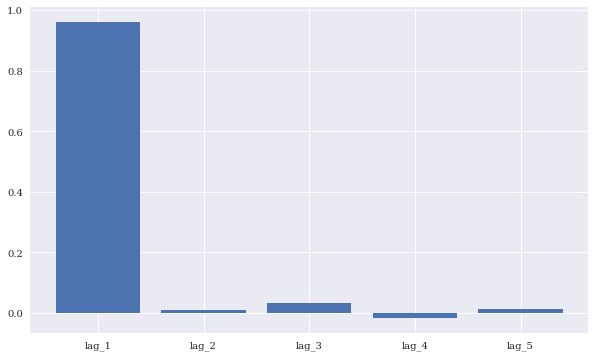

In [102]:
plt.figure(figsize=(10, 6))
plt.bar(cols, reg);
# plt.savefig('../../images/ch15/strat_plot_04.png');

In [103]:
data['Prediction'] = np.dot(data[cols], reg)

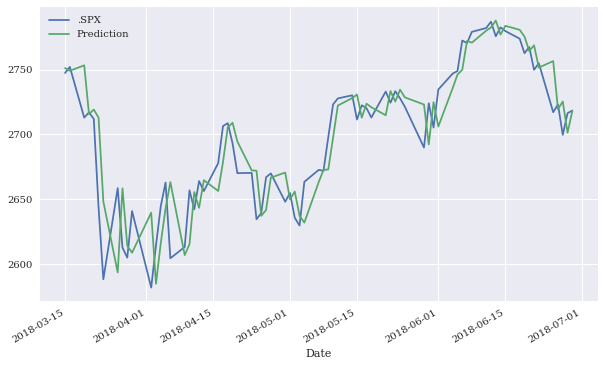

In [104]:
data[[symbol, 'Prediction']].iloc[-75:].plot(figsize=(10, 6));
# plt.savefig('../../images/ch15/strat_plot_05.png');